# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [0.1, 0.01]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = ['SGD', 'RMSProp']

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for opti in OPTIMIZER:
    for l in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with optimizer=%s and learning rate=%.2f" % (opti, l))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        if(opti=="SGD"):
            optimizer = keras.optimizers.SGD(lr=l)
        else:
            optimizer = keras.optimizers.RMSprop(lr=l)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
        
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
        
        exp_name_tag = "exp-optimizer:%s, learning rate=%s" % (opti, str(l))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Experiment with optimizer=SGD and learning rate=0.10
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instruc

50000/50000 [==============================] - 16s 315us/step - loss: 0.8119 - acc: 0.7100 - val_loss: 1.8408 - val_acc: 0.4514
Epoch 48/50
50000/50000 [==============================] - 15s 304us/step - loss: 0.8106 - acc: 0.7117 - val_loss: 1.6586 - val_acc: 0.4847
Epoch 49/50
50000/50000 [==============================] - 15s 302us/step - loss: 0.7776 - acc: 0.7250 - val_loss: 1.6118 - val_acc: 0.5094
Epoch 50/50
50000/50000 [==============================] - 13s 265us/step - loss: 0.7745 - acc: 0.7249 - val_loss: 1.7519 - val_acc: 0.4721
Experiment with optimizer=SGD and learning rate=0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hid

50000/50000 [==============================] - 16s 329us/step - loss: 1.2513 - acc: 0.5610 - val_loss: 1.4110 - val_acc: 0.5005
Epoch 48/50
50000/50000 [==============================] - 16s 324us/step - loss: 1.2465 - acc: 0.5612 - val_loss: 1.4378 - val_acc: 0.4877
Epoch 49/50
50000/50000 [==============================] - 16s 315us/step - loss: 1.2409 - acc: 0.5645 - val_loss: 1.4234 - val_acc: 0.5031
Epoch 50/50
50000/50000 [==============================] - 15s 304us/step - loss: 1.2248 - acc: 0.5698 - val_loss: 1.4477 - val_acc: 0.4943
Experiment with optimizer=RMSProp and learning rate=0.10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________

50000/50000 [==============================] - 12s 235us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 12s 235us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 12s 250us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 14s 272us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with optimizer=RMSProp and learning rate=0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________

50000/50000 [==============================] - 13s 256us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 12s 247us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 11s 229us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 11s 228us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

'\n將實驗結果繪出\n'

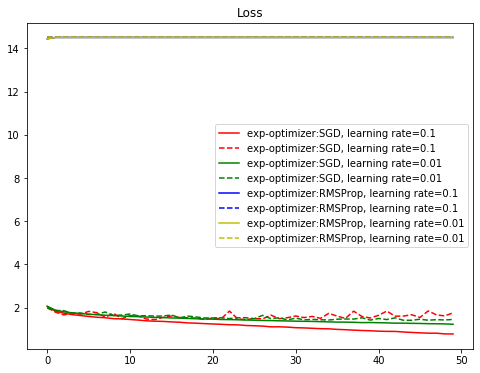

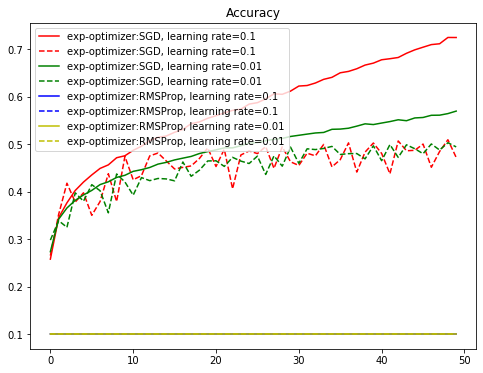

In [9]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()